# Solutions to Mock Exam

This document contains the solution to the mock exam for Game Theory.

It also includes some uses of `python` code to confirm hand calculations and/or draw plots (although in the exam the plots would be expected to be done by hand).

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import nashpy as nash

## Q1

### a)

**Definition of a Normal Form Game**

An $N$-player normal form game consists of:

- A finite set of $N$ players.
- An action set for the players:  
  $\{\mathcal{A}_1, \mathcal{A}_2, \dots, \mathcal{A}_N\}$.
- A set of payoff functions for the players:  
  $u_i : \mathcal{A}_1 \times \mathcal{A}_2 \times \dots \times \mathcal{A}_N 
  \to \mathbb{R}$.

[1]

**Definition of a Strictly Dominated Strategy**

In an $N$-player normal form game, an action $a_i \in \mathcal{A}_i$ is said to
be **strictly dominated** if there exists a strategy
$\sigma_i \in \Delta(\mathcal{A}_i)$ such that:

$$
u_i(\sigma_i, s_{(-i)}) > u_i(a_i, s_{(-i)}) \quad \text{for all } s_{(-i)} \in S_{(-i)}.
$$

[1]

**Definition of a Weakly Dominated Strategy**

In an $N$-player normal form game, an action $a_i \in \mathcal{A}_i$
is said to be **weakly dominated** if there exists a
strategy $\sigma_i \in \Delta(\mathcal{A}_i)$ such that:

$$
u_i(\sigma_i, s_{-i}) \geq u_i(s_i, s_{-i})
\quad \text{for all } s_{-i} \in S_{-i},
$$

and

$$
u_i(\sigma_i, \bar{s}) > u_i(s_i, \bar{s})
\quad \text{for some } \bar{s} \in S_{-i}.
$$

[1]

**Definition of a Best response strategy**

In an $N$-player normal form game, a strategy $s^*$ for player $i$ is a
**best response** to some incomplete strategy profile $s_{-i}$ if and only if:

$$
u_i(s^*,\ s_{-i}) \geq u_i(s,\ s_{-i}) \quad \text{for all } s \in \Delta(\mathcal{A}_i).
$$

[1]

**Definition of Nash Equilibrium**

In an $N$-player normal form game, a **Nash equilibrium** is a strategy profile  
$\tilde{s} = (\tilde{s}_1, \tilde{s}_2, \dots, \tilde{s}_N)$ such that:

$$
u_i(\tilde{s}) = \max_{\bar{s}_i \in \Delta(\mathcal{A}_i)} u_i(\bar{s}_i, \tilde{s}_{-i}) \quad \text{for all } i
$$

[1]

### b)

#### (i)

We have:

$$
M_r = 
\begin{pmatrix}
\underline{2} & 1 \\
1 & \underline{3}
\end{pmatrix}
\qquad
M_c = 
\begin{pmatrix}
3 & \underline{4} \\
\underline{3} & 2
\end{pmatrix}
$$

[3]

Thus, there are no pairs of best response in actions. [2]

#### (ii)

We have:

$$
u_1((1, 0), \sigma_2) = 2y + 1 - y = 1 + y
$$

[1]

and

$$
u_1((0, 1), \sigma_2) = y + 3 - 3 y = 3 - 2y
$$

[1]

The plots:

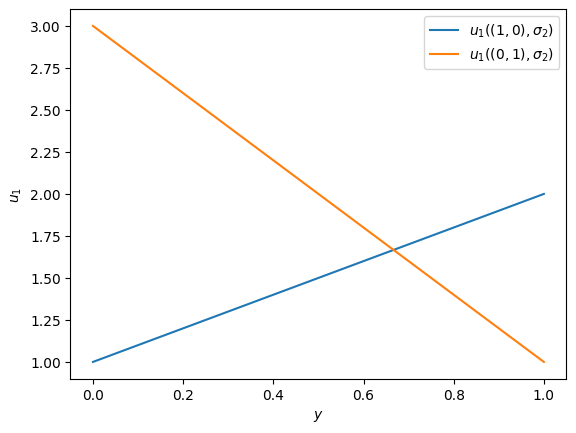

In [2]:
y = np.array((0, 1))

plt.figure()
plt.plot(y, 1 + y, label=r"$u_1((1, 0), \sigma_2)$")
plt.plot(y, 3 - 2 * y, label=r"$u_1((0, 1), \sigma_2)$")
plt.ylabel("$u_1$")
plt.xlabel("$y$")
plt.legend()

[1]

The intersection point is given at:

$$
1 + y = 3 - 2y \implies y = 2/3
$$

[1]

#### (iii)

We have:

$$
u_2(\sigma_1, (1, 0)) = 3
$$

[1]

and

$$
u_2(\sigma_1, (0, 1)) = 4x+2(1-x)=2+2x
$$

[1]

The plots:

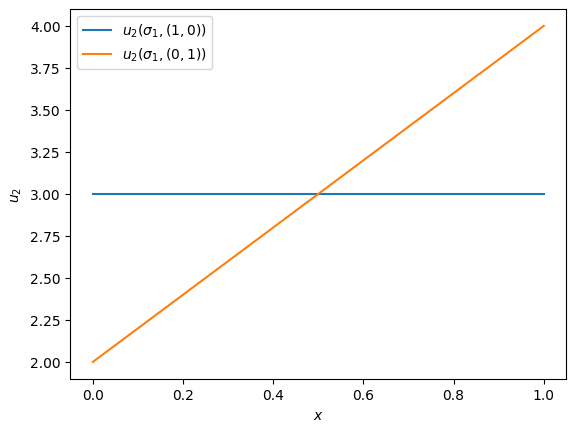

In [3]:
x = np.array((0, 1))

plt.figure()
plt.plot(x, (3, 3), label=r"$u_2(\sigma_1, (1, 0))$")
plt.plot(x, 2 + 2 * x, label=r"$u_2(\sigma_1, (0, 1))$")
plt.ylabel("$u_2$")
plt.xlabel("$x$")
plt.legend()

[1]

The intersection point is given at:

$$
3 = 2 + 2x \implies x=1/2
$$

[1]


#### (iv)

**Theorem**

In a two-player game $(A,\ B) \in \left(\mathbb{R}^{m \times n}\right)^2$,
a strategy $\sigma_r^*$ of the row player is a **best response** to a strategy
$\sigma_c$ of the column player if and only if:

$$
\sigma_{r^*}(i) > 0 \quad \Rightarrow \quad (A \sigma_c^\mathsf{T})_i =
\max_{k \in \mathcal{A}_1}(A \sigma_c^\mathsf{T})_k
\quad \text{for all } i \in \mathcal{A}_1
$$

[2]

**Proof**

The term $(A \sigma_c^\mathsf{T})_i$ represents the utility for the row player
when playing their $i^{\text{th}}$ action. Thus:

$$
\sigma_r A \sigma_c^\mathsf{T} = \sum_{i=1}^{m} \sigma_{r}(i) \cdot (A \sigma_c^\mathsf{T})_i
$$

Let $u = \max_k (A \sigma_c^\mathsf{T})_k$. Then:

$$
\begin{align}
\sigma_r A \sigma_c^\mathsf{T}
&= \sum_{i=1}^{m} \sigma_r(i) \left[u - u + (A \sigma_c^\mathsf{T})_i\right] \\
&= \sum_{i=1}^{m} \sigma_r(i) u - \sum_{i=1}^{m} \sigma_r(i) (u - (A \sigma_c^\mathsf{T})_i) \\
&= u - \sum_{i=1}^{m} \sigma_r(i) (u - (A \sigma_c^\mathsf{T})_i)
\end{align}
$$

Since $u - (A \sigma_c^\mathsf{T})_i \geq 0$ for all $i$,
the maximum expected utility for the row player is $u$, and this occurs **if and only if**:

$$
\sigma_r(i) > 0 \quad \Rightarrow \quad (A \sigma_c^\mathsf{T})_i = u
$$

as required.

[2]

We know that there are no NE with support size 1. Applying the best response theorem corresponds to:

$$
u_1((1, 0), \sigma_2) = u_1((0, 1), \sigma_2) \implies \sigma_2 = (2/3, 1/3)
$$

[1]

and


$$
u_2(\sigma_1, (1, 0)) = u_2(\sigma_1, (1, 0)) \implies \sigma_1 = (1/2, 1/2)
$$

[1]

Looking at (ii) and (iii) we see that the best responses are:

$$
\sigma_r^*=
\begin{cases}
(0, 1)& y<2/3\\
(1, 0)& y>2/3\\
(x, 1-x)& y=2/3\\
\end{cases}
$$

and

$$
\sigma_c^*=
\begin{cases}
(1, 0)& x<1/2\\
(0, 1)& x>1/2\\
(y, 1-y)& y=1/2\\
\end{cases}
$$

Only $x=1/2$ and $y=2/3$ gives best responses to each other. This confirms the results.

[1]

In [4]:
M_r = np.array(
    (
        (2, 1),
        (1, 3),
    )
)
M_c = np.array(
    (
        (3, 4),
        (3, 2),
    )
)
game = nash.Game(M_r, M_c)
tuple(game.support_enumeration())

((array([0.5, 0.5]), array([0.66666667, 0.33333333])),)

## Q2

### (a)

For developers:

$$
\begin{cases}
f_P(x, y) & = 3 y_H + 1 - y_H = 2y_H + 1\\
f_R(x, y) & = 2
\end{cases}
$$

[1]

For reviewers:

$$
\begin{cases}
f_H(x, y) & = 3x_P + 5(1 - x_P) = 5 - 2x_P\\
f_B(x, y) & = 4x_P+(1 - x_P) = 1 + 3x_P
\end{cases}
$$

[1]

In [5]:
x_P = sym.Symbol("x_P")
y_H = sym.Symbol("y_H")

M_r = sym.Matrix(
    (
        (3, 1),
        (2, 2),
    )
)
M_c = sym.Matrix(
    (
        (3, 4),
        (5, 1),
    )
)

sigma_r = sym.Matrix([x_P, 1 - x_P]).T
sigma_c = sym.Matrix([y_H, 1 - y_H])

f_P, f_R = M_r @ sigma_c
f_P

2*y_H + 1

In [6]:
f_R

2

In [7]:
f_H, f_B = sigma_r @ M_c
f_H

5 - 2*x_P

In [8]:
f_B

3*x_P + 1

### (b)

The asymmetric replicator dynamics is given by:

$$
\frac{dx_i}{dt} = x_i\left((f_x)_i - \phi_x\right) \quad \text{for all } 1 \leq i \leq M
$$

$$
\frac{dy_j}{dt} = y_j\left((f_y)_j - \phi_y\right) \quad \text{for all } 1 \leq j \leq N
$$

[1]

Let us start by computing $\phi_x$:

$$
\begin{align}
\phi_x &= x_Pf_P + (1 - x_P)f_R\\
       &= x_P(2y_H+1) + (1 - x_P)2\\
       &= 2x_Py_H +x_p+ 2 - 2x_P\\
       &= 2x_Py_H + 2 - x_P
       \end{align}
$$

[2]

So:

$$
\begin{align}
\frac{dx_P}{dt} & =x_P(2y_H + 1 - 2x_Py_H - 2 + x_P)\\
                & =x_P(2y_H - 2x_Py_H - 1 + x_P)
\end{align}
$$

as required.

[1]

Now for $\phi_y$:

$$
\begin{align}
\phi_y &= y_Hf_H + (1 - y_H)f_B\\
       &= y_H(5 - 2x_P) + (1 - y_H)(1+3x_P)\\
       &5y_H - 2x_Py_H + 1 - y_H + 3x_P -3x_Py_H\\
       &=4y_H - 5x_Py_H + 3x_P +1
       \end{align}
$$

[2]

So:

$$
\begin{align}
\frac{dy_H}{dt} & =y_H(5 - 2x_P - 4y_H + 5x_Py_H - 3x_P -1)\\
                & =y_H(4 - 5x_P - 4y_H + 5x_Py_H)
\end{align}
$$

as required.

[1]

In [9]:
phi_x = x_P * f_P + (1 - x_P) * f_R
dx_P_dt = x_P * (f_P - phi_x)
sym.simplify(dx_P_dt)

x_P*(-2*x_P*y_H + x_P + 2*y_H - 1)

In [10]:
phi_y = y_H * f_H + (1 - y_H) * f_B
dy_H_dt = y_H * (f_H - phi_y)
sym.simplify(dy_H_dt)

y_H*(5*x_P*y_H - 5*x_P - 4*y_H + 4)

### (c)

$(\sigma_r, \sigma_c) = \left((4/5, 1/5), (1/2, 1/2)\right)$ is a Nash Equilibrium if and only if both strategies are best responses to each other. This implies, as the strategies have full support that both players are indifferent from their specifc choice of actions (this is the best response condition theorem).

[1]

Is player 1 indifferent:

$$
M_r\sigma_c^T = \begin{pmatrix}3/2 + 1/2\\2\end{pmatrix} = \begin{pmatrix}2\\2\end{pmatrix}
$$

Yes, $\sigma_r=(4/5, 1/5)$ is a best response to $\sigma_c = (1/2, 1/2)$

[1]

Is player 2 indifferent:

$$
\sigma_rM_c = \begin{pmatrix}12/5+5/5& 16/5 + 1/5\end{pmatrix} = \begin{pmatrix}17/15 & 17/5\end{pmatrix}
$$

Yes, $\sigma_c=(1/2, 1/2)$ is a best response to $\sigma_r = (4/5, 1/5)$

[1]

Thus this is indeed a Nash equilibrium.

In [11]:
sigma_r = sym.Matrix([sym.S(4) / 5, sym.S(1) / 5]).T
sigma_c = sym.Matrix([sym.S(1) / 2, sym.S(1) / 2])

M_r @ sigma_c

Matrix([
[2],
[2]])

In [12]:
sigma_r @ M_c

Matrix([[17/5, 17/5]])

In [13]:
M_r = np.array(M_r, dtype=float)
M_c = np.array(M_c, dtype=float)

game = nash.Game(M_r, M_c)
list(game.support_enumeration())

[(array([0.8, 0.2]), array([0.5, 0.5]))]

### (d)

A stable population is a population where the derivative is 0.

$$
\begin{align}
\left.\frac{dx_P}{dt}\right|_{x_P=4/5, y_H=1/2} & = -2 \cdot 16/25 \cdot 1/2 + 16/25 + 8/8 - 4 /5\\
                                                & = -16/25 + 16/25 + 4/5 -4/5=0
\end{align}
$$

[1]

$$
\begin{align}
\left.\frac{dy_H}{dt}\right|_{x_P=4/5, y_H=1/2} & = 5\cdot 4/5 \cdot 1/4 - 5 \cdot 4/5 \cdot 1/2 - 4/4 + 2\\
                                                & = 1 - 2 - 1 + 2=0
\end{align}
$$

[1]

This is a stable population.

### (e)

Proposed definition:

An ESS is a pair $(x^*, y^*)$ if for all $x_{\epsilon}\ne x^*$ and $y_{\epsilon}\ne y^*$ sufficiently close to
$(x^*, y^*)$ we have:

[1]

$$
f(x^*, (x^*, y^*)) > f(x_{\epsilon}, (x^*, y^*)) 
$$

[2]

**and**

[1]

$$
f(y^*, (x^*, y^*)) > f(y_{\epsilon}, (x^*, y^*)) 
$$

[2]

### (f)

Let us consider a small deviation from $(x,y)=((4/5, 1/5), (1/2, 1/2))$:

$$
({x_P}_{\epsilon}, {y_H}_{\epsilon}) = (4/5 + \epsilon, 1/2 + \epsilon)
$$

[1]

Using Euler integration we would define:

$$
(x^{(0)}, y^{(0)}) = ({x_P}_{\epsilon}, {y_H}_{\epsilon})
$$

[1]

Then we would comput for a given step size $h$ the following sequence:

$$
(x^{(t + 1)}, y^{(t + 1)}) = \left(x^{(t)} + h \left.\frac{dx_P}{dt}\right|_{(x^{(t)}, y^{(t)})}, y^{(t)} + h \left.\frac{dy_H}{dt}\right|_{(x^{(t)}, y^{(t)})}\right)
$$

[1]

For $\epsilon > 0$ a negative value of the derivative would indicate stabiliy and for $\epsilon<0$ a positive value of the derivative would indicate instability.

[1]
This would be an exploratory study, and careful consideration of the value of $h$ would be needed to make any strong conclusions.

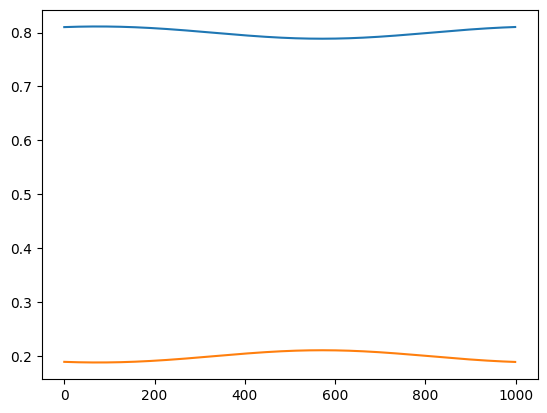

In [14]:
epsilon = 1 / 100
x0 = np.array([4 / 5 + epsilon, 1 / 5 - epsilon])
y0 = np.array([1 / 2 + epsilon, 1 / 2 - epsilon])
xs, ys = game.asymmetric_replicator_dynamics(x0=x0, y0=y0)

plt.figure()
plt.plot(xs);

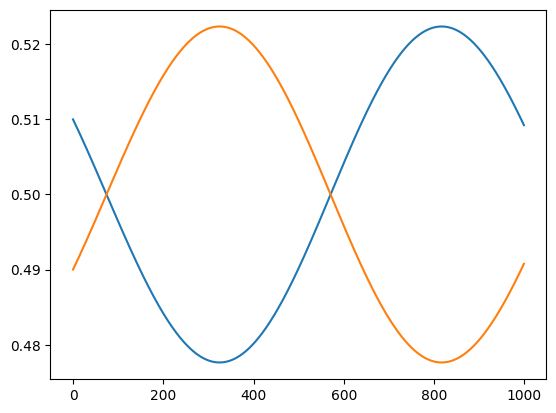

In [15]:
plt.figure()
plt.plot(ys);

## Q3

### (i)

For $(s_C, s_C)$ with infinite discounting factor $\delta$ we have:

$$
\begin{align}
u(s_C, s_C)&=\sum_{i=0}^{\infty}\delta^t 2\\
           &=2\sum_{i=0}^{\infty}\delta^t \\
           &=\frac{2}{1-\delta}
\end{align}$$

[2]

### (ii)

For $(s_D, s_D)$ with infinite discounting factor $\delta$ we have:

$$
\begin{align}
u(s_C, s_C)&=\sum_{i=0}^{\infty}\delta^t 4\\
           &=4\sum_{i=0}^{\infty}\delta^t \\
           &=\frac{4}{1-\delta}
\end{align}$$

[2]

### (iii)

For $(s_G, s_G)$ to be a Nash equilibrium neither player must have an incentive to deviate. Deviation to $s_C$ is trivial and gives the same utility. A deviation to $s_D$ gives a utility of:

[1]

$$
\begin{align}
u(s_D, s_C)&=0 + \sum_{i=1}^{\infty}\delta^t 4\\
           &=4\sum_{i=1}^{\infty}\delta^t \\
           &=\frac{4\delta}{1-\delta}
\end{align}$$

[2]

This deviation is rational if and only if:

$$
\frac{4\delta}{1-\delta} < \frac{2}{1- \delta} \implies 4\delta < 2 \implies \delta < 1 / 2
$$

Thus a $\delta>1/2$ implies that $(s_G, s_G)$ is a Nash equilibrium.

[2]

### (iv)

$$\bar U_i(r,c)=(1-\delta)U_i(r,c)$$

[1]

### (v)

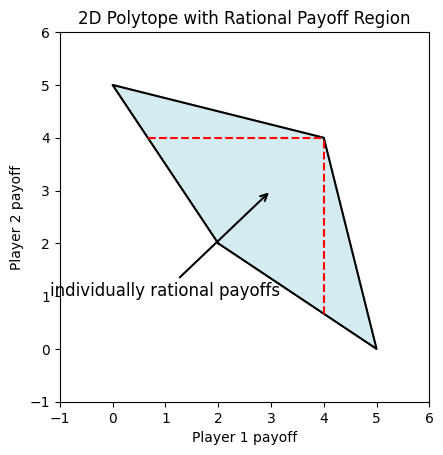

In [16]:

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

vertices = [(2, 2), (0, 5), (4, 4), (5, 0)]

poly = Polygon(vertices, closed=True, facecolor='lightblue', edgecolor='black', alpha=0.5)

fig, ax = plt.subplots()
ax.add_patch(poly)

xs, ys = zip(*vertices)
ax.plot(xs + (xs[0],), ys + (ys[0],), 'k-', lw=1.5)


x1, y1 = 0, 5
x2, y2 = 2, 2

x_horiz = x1 + (x2 - x1) * (5 - 4) / (5 - 2)

x3, y3 = 5, 0
x4, y4 = 2, 2

y_vert = y3 + (y4 - y3) * (5 - 4) / (5 - 2)

ax.plot([x_horiz, 4], [4, 4], 'r--', lw=1.5)
ax.plot([4, 4], [y_vert, 4], 'r--', lw=1.5)

ax.annotate(
    "individually rational payoffs",
    xy=(3, 3),
    xytext=(1, 1),
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=12,
    ha='center'
)

ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)
ax.set_aspect('equal')
ax.set_xlabel("Player 1 payoff")
ax.set_ylabel("Player 2 payoff")
ax.set_title("2D Polytope with Rational Payoff Region")

plt.show()


[4]

### (vi)

Let $(\sigma_1^*,\sigma_2^*)$ be the stage Nash profile that yields $(u_1^*,u_2^*)$.
Now assume that playing $\bar\sigma_1\in\Delta \mathcal{A}_1$ and $\bar\sigma_2\in\Delta \mathcal{A}_2$ in
every stage gives $(v_1,v_2)$ (an individual rational payoff pair).

[3]

Consider the following strategy:

> "Begin by using $\bar \sigma_i$ and continue to use $\bar \sigma_i$ as long as both players use the
> agreed strategies. If any player deviates: use $\sigma_i^*$ for all future stages."

[2]

We begin by proving that the above is a Nash equilibrium.

Without loss of generality if player 1 deviates to $\sigma_1'\in\Delta S_1$ such that
$u_1(\sigma_1',\bar \sigma_2)>v_1$ in stage $k$ then:

[1]

$$U_1^{(k)}=\sum_{t=1}^{k-1}\delta^{t-1}v_1+\delta^{k-1}u_1(\sigma_1',\bar \sigma_2)+u_1^*\left(\frac{1}{1-\delta}-\sum_{t=1}^{k}\delta^{t-1}\right)$$

[1]

Recalling that player 1 would receive $v_1$ in every stage with no
deviation, the biggest gain to be made from deviating is if player 1 deviates
in the first stage (all future gains are more heavily discounted). Thus if we
can find $\bar\delta$ such that $\delta>\bar\delta$ implies that
$U_1^{(1)}\leq \frac{v_1}{1-\delta}$ then player 1 has no incentive to deviate.

[1]

$$
\begin{aligned}
U_1^{(1)}=u_1(\sigma_1',\bar\sigma_2)+u_1^*\frac{\delta}{1-\delta}&\leq\frac{v_1}{1-\delta}\\
(1-\delta)u_1(\sigma_1',\bar\sigma_2)+u_1^*\delta&\leq v_1\\
u_1(\sigma_1',\bar\sigma_2)-v_1&\leq \delta(u_1(\sigma_1',\bar\sigma_2)-u_1^*)\\
\end{aligned}
$$

[2]

as $u_1(\sigma_1',\bar \sigma_2)>v_1>u_1^*$, taking
$\bar\delta=\frac{u_1(\sigma_1',\bar\sigma_2)-v_1}{u_1(\sigma_1',\bar\sigma_2)-u_1^*}$ gives the
required required result for player 1 and repeating the argument for player 2 completes the
proof of the fact that the prescribed strategy is a Nash equilibrium.

By construction this strategy is also a subgame perfect Nash equilibrium. Given
any history **both** players will act in the same way and no player will have an incentive to deviate:

- If we consider a subgame just after any player has deviated from
  $\bar\sigma_i$ then both players use $\sigma_i^*$.
- If we consider a subgame just after no player has deviated from
  $\bar\sigma_i$ then both players continue to use $\bar\sigma_i$.

[1]

## Q4

### (a)

A **routing game** $(G,r,c)$ is defined on a graph $G=(V,E)$ with a defined set of sources
$s_i$ and sinks $t_i$. Each source-sink pair corresponds to a set of traffic
(also called a commodity) $r_i$ that must travel along the edges of $G$ from
$s_i$ to $t_i$.
Every edge $e$ of $G$ has associated to it a nonnegative, continuous and
nondecreasing cost function (also called latency function) $c_e$.

[2]

### (b)

For a routing game $(G,r,c)$ a flow $\tilde f$ is called a **Nash flow**
if and only if for every commodity $i$ and any two paths
$P_1,P_2\in\mathcal{P}\_i$ such that $f\_{P_1}>0$ then:

[1]

We have:

$$
\begin{align}
f_1 + 1 & = 1+ 1 - f_1\\
      f_1 &= 1/ 2
\end{align}
$$

So $\tilde f = (1/2, 1/2)$

[2]

### (c)

For a routing game $(G,r,c)$ we define the optimal flow $f^*$ as the solution to the following optimisation problem:

Minimise $\sum_{e\in E}c_e(f_e)f_e$:

Subject to:

$$
\begin{align*}
\sum_{P\in\mathcal{P}_i}f_P&=r_i&&\text{for all }i\\
f_e&=\sum_{P\in\mathcal{P}\text{ if }e\in P}f_P&&\text{ for all }e\in E\\
f_P&\geq 0
\end{align*}
$$


[1]

We have:

$$
\begin{align}
C(f) &= f_1^2 + f_1 + (1 - f_1) + (1 - f_1) ^2\\
&= 2f_1^2 -2f_1 + 2
\end{align}
$$

This is minimized when:

$$
\frac{dC}{df} = 0 \implies 4f_1 - 2 = 0 \implies f_1 = 1 / 2
$$

Thus:

$$
f^*=(1/2, 1/2)
$$

[2]

### (d)

A feasible flow $\tilde f$ is a Nash flow for the routing game $(G,r,c)$ if and only if it is a minima for $\Phi(f)$.

[2]

### (e)

$$
\begin{align}
\Phi(f) & = f_1 ^ 2 / 2 + f_1 + (1 - f_1) +(1 - f_1) ^ 2 / 2\\
        & = f_1 ^2 - f_1 + 3/2
\end{align}
$$

[1]

Minimized when:

$$
\frac{d\Phi}{df} = 0 \implies 2f_1 - 1 = 0 \implies f_1 = 1 / 2
$$

[1]

### (f)

A feasible flow $f^*$ is an optimal flow for $(G,r,c)$ if and only if $f^*$ is a Nash flow for $(G,r,c^*)$.

[1]

The marginal flow on the edges with $c(x)=x$ is $\frac{d}{dx}xc(x) = 2x$, thus:

$$
\begin{align}
2f_1 + 1 &= 1 + 2(1 - f_1)\\
       4f_1 & = 2\\
       f_1 & 1/2
\end{align}
$$

[2]

### (h)

The function $W_q$ is nonnegative, continuous and nondecreasing in $\lambda$for $0 \leq \lambda \leq µ$.
Thus using these functions as latency functions in $\lambda$ assuming each M/M/1 queue
has service rate parameter $\mu_i$ will give the described model. This holds since as
long as the total arrival rate is less than the service rate at each queue. 

[2]

### (i)

For the Nash Flow we need to equate:

$$
\frac{x}{3(3 - x)} = \frac{2 - x}{4(4 - (2 - x))}
$$

[1]

This gives:

$$
8x + 4x ^ 2 - 18 + 6x + 9x - 3x ^ 2 =x^2 + 23x - 18 = 0
$$

[1]

This has one no negative root:

$$
\frac{\sqrt{601} - 23}{2} \approx .7577
$$

[1]
thus $\tilde f \approx (.7577, 1.2433)$.

In [17]:
x = sym.Symbol("x")
equation = sym.Eq(lhs = x / (3 * (3 - x)), rhs=(2 - x) / (4 * (4 - (2 - x))))
sym.solveset(equation, x)

{-23/2 + sqrt(601)/2, -sqrt(601)/2 - 23/2}

For the optimal flow, let us use marginal costs:

$$c^* = \frac{d}{dx}\frac{x^2}{\mu(\mu - x)}= \frac{2x}{\mu(\mu -x)} + \frac{x^2}{\mu(\mu -x)^2}$$

[1]

Thus we now equate:

$$
\frac{2x}{3(3-x)} + \frac{x^2}{3(3-x)^2} = \frac{4 - 2x}{4(4-(2 - x))} + \frac{(2 - x)^2}{4(4-(2- x))^2} 
$$

This is equivalent to:

$$
\begin{align}
\frac{2x(3-x) + x^2}{3(3-x)^2} & = \frac{(4-2x)(2 + x) + (2 - x)^2}{4(2 + x)^2} \\
(2x(3-x) + x^2)(4(2 + x) ^2)& = ((4-2x)(2 + x) + (2 - x)^2)(3(3 - x)^2)
\end{align}
$$

Expanding both left and right hand sides:

$$
-4x ^ 4 + 8x ^3 + 80x^2 + 96x = -3x ^ 4 + 6x^3 + 81x^2 - 324x+324
$$

[2]

In [18]:
lhs = (2 * x * (3 - x) + x ** 2) * (4 * (2 + x) ** 2)
sym.expand(lhs)

-4*x**4 + 8*x**3 + 80*x**2 + 96*x

In [19]:
rhs = ((4 - 2 * x) * (2 + x) + (2 - x) ** 2) * (3 * (3 - x) ** 2)
sym.expand(rhs)

-3*x**4 + 6*x**3 + 81*x**2 - 324*x + 324

Simplify this further gives the same equation as in the tip:

$$
x ^ 4 - 2x ^ 3+x ^ 2 - 420x+324 = 0
$$

In [20]:
sym.expand(rhs - lhs)

x**4 - 2*x**3 + x**2 - 420*x + 324

This implies $f^*\approx(.7715, 1.2285)$

[1]